# List of project's dependencies
Below are listed imports that are needed for program to work properly commented with required install (see also requirements.txt)

In [26]:
#List of imports
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error, mean_squared_error
import sys
sys.path.append('../../code')
from functions import *

### Divide data into tensors

In [27]:
X_train, X_test, y_train, y_test = price_preprocessing()

# Compute on CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train = torch.tensor(np.array(X_train), dtype=torch.float32).to(device)
X_test  = torch.tensor(np.array(X_test), dtype=torch.float32).to(device)
Y_train = torch.tensor(np.array(y_train), dtype=torch.float32).reshape(-1, 1).to(device)
Y_test  = torch.tensor(np.array(y_test), dtype=torch.float32).reshape(-1, 1).to(device)

### MLP model 
Multilayer Perceptron 

In [28]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

 
input_size = X_train.shape[1]
hidden_size = 100
output_size = 1

model = MLP(input_size, hidden_size, output_size).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [29]:
#Training the model
num_epochs = 100
batch_size = 100

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = Y_train[i:i+batch_size]

        # Forward pass
        outputs = model(batch_X).to(device)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test)
    test_loss = criterion(y_pred_tensor, Y_test)
    print('Test Loss:', test_loss.item())

# Convert predictions and true labels back to numpy arrays
y_pred_tensor_cpu = y_pred_tensor.to("cpu")
y_pred = y_pred_tensor_cpu.numpy()
y_true = Y_test.to("cpu").numpy()

Epoch [10/100], Loss: 9355065344.0000
Epoch [20/100], Loss: 11596726272.0000
Epoch [30/100], Loss: 10851729408.0000
Epoch [40/100], Loss: 10752620544.0000
Epoch [50/100], Loss: 10665635840.0000
Epoch [60/100], Loss: 10795738112.0000
Epoch [70/100], Loss: 10854086656.0000
Epoch [80/100], Loss: 10974667776.0000
Epoch [90/100], Loss: 11049431040.0000
Epoch [100/100], Loss: 11091486720.0000
Test Loss: 19461099520.0


MSE: 19461098535.033478
MAE: 104508.62344701274
R-squared: 0.6919434812267371


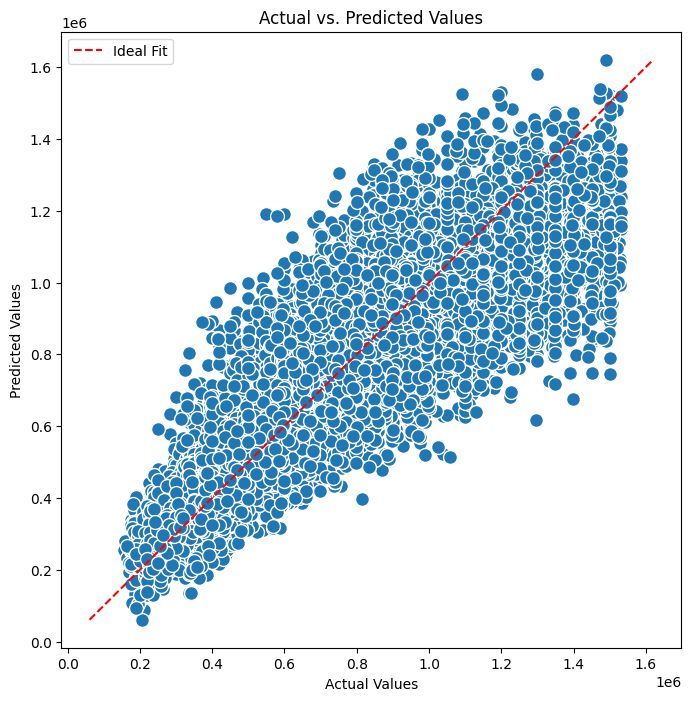

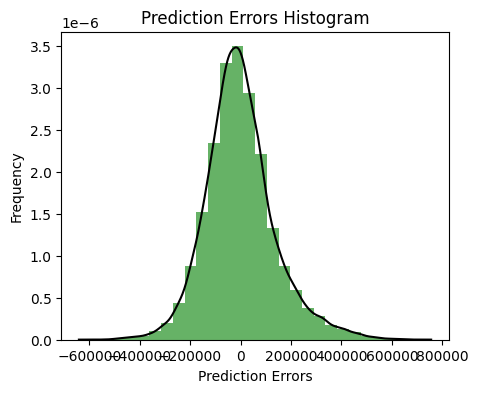

In [30]:
evaluate_model(
    true_data=np.asarray(y_test).flatten(), 
    predicted_data=np.asarray(y_pred).flatten()
)

In [31]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.fc5 = nn.Linear(hidden_size4, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x
    
# Initialize the model
input_size = X_train.shape[1]
hidden_size1 = 100
hidden_size2 = 150
hidden_size3 = 70
hidden_size4 = 20
output_size = 1

model = MLP(input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, output_size).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [32]:
#Training the model
num_epochs = 100
batch_size = 100

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = Y_train[i:i+batch_size]

        # Forward pass
        outputs = model(batch_X).to(device)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test)
    test_loss = criterion(y_pred_tensor, Y_test)
    print('Test Loss:', test_loss.item())

# Convert predictions and true labels back to numpy arrays
y_pred_tensor_cpu = y_pred_tensor.to("cpu")
y_pred = y_pred_tensor_cpu.numpy()
y_true = Y_test.to("cpu").numpy()

Epoch [10/100], Loss: 10138682368.0000
Epoch [20/100], Loss: 6826576896.0000
Epoch [30/100], Loss: 8047254528.0000
Epoch [40/100], Loss: 7109262336.0000
Epoch [50/100], Loss: 7845885440.0000
Epoch [60/100], Loss: 8359836672.0000
Epoch [70/100], Loss: 6899826176.0000
Epoch [80/100], Loss: 7814772224.0000
Epoch [90/100], Loss: 4845293568.0000
Epoch [100/100], Loss: 4443133440.0000
Test Loss: 14159619072.0


MSE: 14159617792.098877
MAE: 87771.24886992744
R-squared: 0.8028132702391972


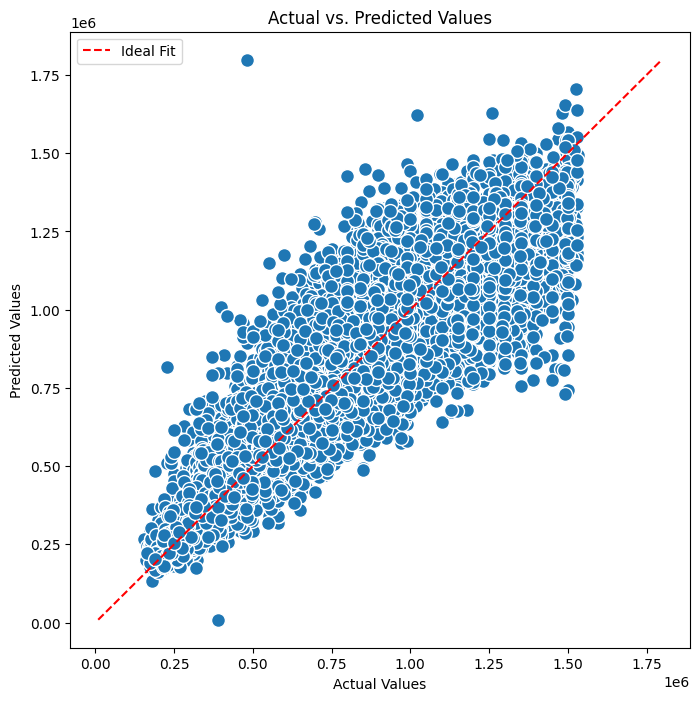

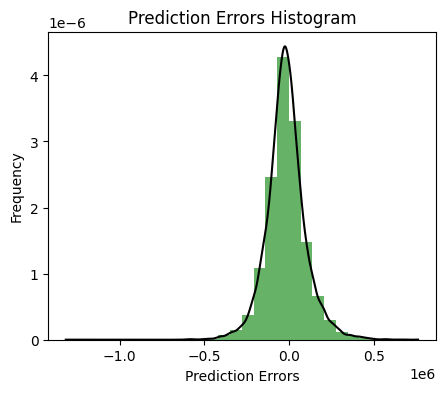

In [33]:
evaluate_model(
    true_data=np.asarray(y_test).flatten(), 
    predicted_data=np.asarray(y_pred).flatten()
)